In [218]:
import yaml
import imutils
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from pixell import enmap,utils, reproject, enplot
from scipy.interpolate import RectBivariateSpline

In [219]:
def tileFinder(ra, dec, data):
    #Given an RA and Dec in deg, find the S18d tile containing that RA and Dec
    for i, tile in enumerate(data):
        box = tile['RADecSection']
        if box[0] >= box[1]:
            if (360>= ra >= box[0] or 0 <= ra <box[1]) and box[2]<=dec<= box[3]:
                return tile['tileName']
        if box[0]<=ra<=box[1] and box[2]<=dec<= box[3]:
            return tile['tileName']
    return None

In [220]:
tileDefPath = '/home/alex/Desktop/Clusters/S18d_202006/selFn/tileDefinitions.yml'
with open(tileDefPath) as f:
    s18d = yaml.load(f)

<ipython-input-220-be53557ea2ff>:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  s18d = yaml.load(f)


In [221]:
clusterFile = '/home/alex/Desktop/Clusters/ACTCOWS_matches_V03.fits'
act = fits.open(clusterFile)

actRA = act[1].data['ACT RA(deg)'] 
actDec = act[1].data['ACT Dec(deg)'] 
actName = act[1].data['ACT Cluster']

In [222]:
i = 0

In [223]:
ra = actRA[i]
dec = actDec[i]
data = s18d
name = actName[i]
width = 0.5 

In [224]:
mapPath = '/home/alex/Desktop/Clusters/S18d_202006/filteredMaps/'
tileName = tileFinder(ra, dec, data)
tile = enmap.read_map(mapPath+tileName+'/Arnaud_M2e14_z0p4#'+tileName+'_SNMap.fits')
stamp = reproject.postage_stamp(tile, ra, dec, width*20, 0.5)

box = np.array([[ra-width/2,dec-width/2],[ra+width/2,dec+width/2]]) * utils.degree
shape, wcs = enmap.geometry(pos=box,res=0.5 * utils.arcmin,proj='car')
stamp.wcs = wcs

In [225]:
# the function scaler resizes a 2D numpy array 
# arr is your array input
# newShape is a tuple for your new array shape
def scaler(arr, newShape):
    
    # unscaled array shape
    oldX = arr.shape[0]
    oldY = arr.shape[1]
    
    # scaled array shape
    newX = newShape[0]
    newY = newShape[1]

    # x and y coordinates
    x = np.linspace(0, oldX-1.0, newX)
    y = np.linspace(0, oldY-1.0, newY)
    
    # kx and ky = order of interpolation
    interpolated = RectBivariateSpline(np.arange(oldX), np.arange(oldY), arr, kx=3, ky=3)
    
    return interpolated(y,x)

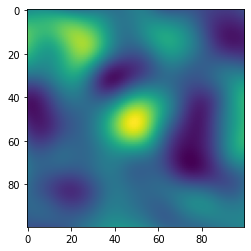

In [228]:
newSize = (100,100)
plt.imshow(scaler(stamp[0],newSize))